In [1]:
""" 
    importing all the modules needed in this file.

"""

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA,TruncatedSVD,KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud
from nltk import corpus
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_csv('Data/Twitter_Data.csv')
print(df.describe())
df

            category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


Text(0, 0.5, 'data points')

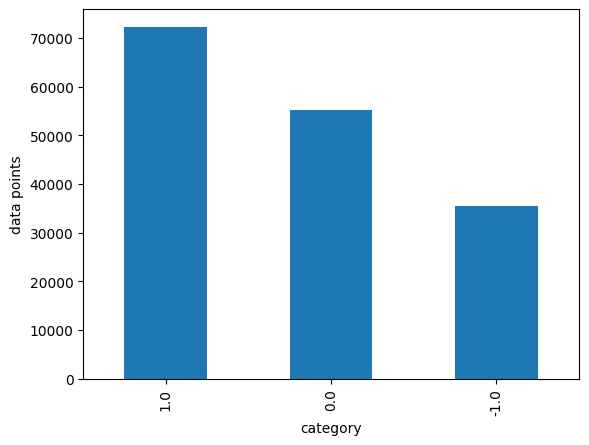

In [3]:
""" 
    visualizing category wise data points.
    how many tweets are positive,neutal or negative. 

"""

df['category'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.ylabel('data points')

In [4]:
print(df['clean_text'].describe())

count                                                162976
unique                                               162976
top       when modi promised “minimum government maximum...
freq                                                      1
Name: clean_text, dtype: object


In [5]:
""" 
    data preprocessing 
        01. removing all stop words , punctuation
        02. removing all the digits , number from text
        03. performing stemming on text

"""
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
punc = list(punctuation)
def text_processing(text):

    text = str(text)
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text=re.sub("(\\d|\\W)+"," ",text)       
    text = re.sub(r'\@\w+|\#'," ",text) 
    text = re.sub(r'[^\w\s\`]'," ",text)   
    text_tokens = word_tokenize(text) 
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in punc] 
    text1 = " ".join(text)
    return text1

df['clean_text'] = df['clean_text'].apply(text_processing)

In [6]:
""" 
    forming word cloud so that we can visualize positive , negative or neutral sentimental words

"""

positive_sentiment_tw = ' '.join( df[df['category']==1]['clean_text'])
negative_sentiment_tw = ' '.join(df[df['category']==-1]['clean_text'])
neutral_sentiment_tw = ' '.join(df[df['category']==0]['clean_text'])

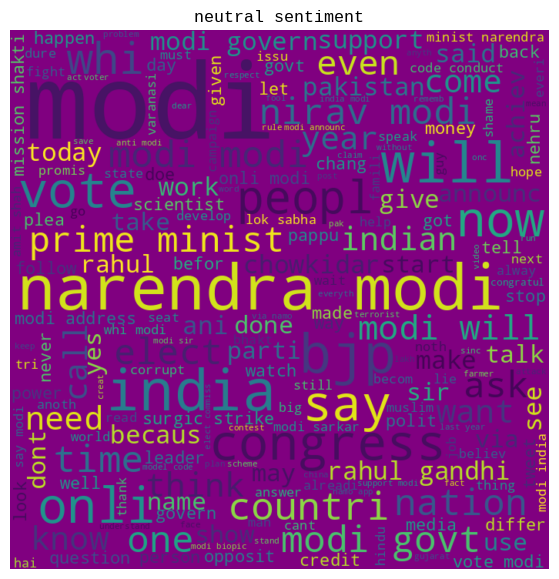

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
# Set the default font for matplotlib to a known font
plt.rcParams['font.sans-serif'] = 'Liberation Mono'

# Create the WordCloud
positive_cloud = WordCloud(width=600, height=600, background_color='black').generate(positive_sentiment_tw)
negative_cloud = WordCloud(width=700,height=700,background_color='green').generate(negative_sentiment_tw)
nuetral_cloud = WordCloud(width=700,height=700,background_color='purple').generate(neutral_sentiment_tw)
# Display the WordCloud
plt.figure(figsize=(10, 7))
#plt.imshow(positive_cloud, interpolation='bilinear')
# plt.imshow(negative_cloud,interpolation='bilinear')
plt.imshow(nuetral_cloud, interpolation='bilinear')
plt.title('neutral sentiment')
plt.axis('off')
plt.savefig('neutral_word_cloud.png')
plt.show()


In [7]:
""" 
    checking the fonts thats are supported by matplotlib

"""

import matplotlib.font_manager
fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(fonts)


['DejaVu Sans Display', 'STIXSizeFourSym', 'cmr10', 'DejaVu Sans Mono', 'cmmi10', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Serif', 'STIXGeneral', 'STIXSizeFiveSym', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Sans', 'cmb10', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'cmss10', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Serif', 'STIXGeneral', 'cmsy10', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans', 'cmex10', 'STIXNonUnicode', 'cmtt10', 'Lohit Tamil', 'Padauk Book', 'Nimbus Mono PS', 'DejaVu Sans Mono', 'Yrsa', 'Sawasdee', 'KacstOne', 'Syamala Ramana', 'Inconsolata', 'Garuda', 'DejaVu Sans', 'Purisa', 'FreeMono', 'Inconsolata', 'Liberation Mono', 'Sawasdee', 'URW Gothic', 'Nimbus Sans Narrow', 'Source Code Pro', 'Nimbus Sans Narrow', 'Waree', 'Ubuntu', 'Laksaman', 'P052', 'KacstDigital', 'AnjaliOldLipi', 'Ubu

In [8]:
"""
    perform encoding on text.
    convert text to integer using Tfidf vectorizers

"""

vectorizer = TfidfVectorizer()
vecotrs = vectorizer.fit_transform(df['clean_text'])
"""
    splitting data into train , test and validation dataset

"""
def transform(x):
    if x==-1:
        return 0
    elif x==0:
        return 1
    elif x==1: 
        return 2
    else:
        return 0

df['category'] = df['category'].apply(transform)
y = df['category']
x_train,x_test,y_train,y_test = train_test_split(vecotrs,y,shuffle=True,test_size=0.3)

In [9]:
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)
print(x_train.shape)

(114086,)
(48894,)
(48894, 82847)
(114086, 82847)


In [10]:
""" 
    model building using KNN , KNeighborsClassifier, svm and random forest classifier

"""
model = RandomForestClassifier(criterion='log_loss',n_estimators=120)
model.fit(x_train,y_train)
y_pred_tree = model.predict(x_test)
print(f"Accuracy of RandomForestClassifier is {accuracy_score(y_true=y_test,y_pred=y_pred_tree)}")
print(confusion_matrix(y_true=y_test,y_pred=y_pred_tree))
print(f" Classification report of RandomForestClassifier  is\n {classification_report(y_true=y_test,y_pred=y_pred_tree)}")


In [ ]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass
generate_auc_roc_curve(model, x_test)

In [10]:
model_svc = SVC(kernel='rbf',gamma=0.4)
model_svc.fit(x_train,y_train)
def new_func(model_svc):
    y_pred_svc = model_svc.predict(x_test)
    print(f"Accuracy of SVC is {accuracy_score(y_true=y_test,y_pred=y_pred_svc)}")
    print(confusion_matrix(y_true=y_test,y_pred=y_pred_svc))
    print(f" Classification report of SVC  is\n {classification_report(y_true=y_test,y_pred=y_pred_svc)}")

new_func(model_svc)

In [12]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

In [13]:
print(f"Accuracy of KNeighborsClassifier is {accuracy_score(y_true=y_test,y_pred=y_pred_knn)}")
print(confusion_matrix(y_true=y_test,y_pred=y_pred_knn))
print(f" Classification report of KNeighborsClassifier  is\n {classification_report(y_true=y_test,y_pred=y_pred_knn)}")

Accuracy of KNeighborsClassifier is 0.403239661308136
[[  853  9568    75]
 [  105 16207   257]
 [  143 19030  2656]]
 Classification report of KNeighborsClassifier  is
               precision    recall  f1-score   support

           0       0.77      0.08      0.15     10496
           1       0.36      0.98      0.53     16569
           2       0.89      0.12      0.21     21829

    accuracy                           0.40     48894
   macro avg       0.68      0.39      0.30     48894
weighted avg       0.69      0.40      0.31     48894



In [14]:
model_gradient_boosting = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,criterion='friedman_mse')
model_gradient_boosting.fit(x_train,y_train)
y_pred_grad = model_gradient_boosting.predict(x_test)
print(f"Accuracy of GradientBoostingClassifier is {accuracy_score(y_true=y_test,y_pred=y_pred_grad)}")
print(f"confusion matrix of GrandientBoostingClassifier is\n {confusion_matrix(y_true=y_test,y_pred=y_pred_grad)}")
print(f"Classification report of GradientBoostingClassifier is\n {classification_report(y_true=y_test,y_pred=y_pred_grad)}")

Accuracy of GradientBoostingClassifier is 0.7412361434940893
confusion matrix of GrandientBoostingClassifier is
 [[ 4468  2818  3210]
 [  145 13831  2593]
 [  649  3237 17943]]
Classification report of GradientBoostingClassifier is
               precision    recall  f1-score   support

           0       0.85      0.43      0.57     10496
           1       0.70      0.83      0.76     16569
           2       0.76      0.82      0.79     21829

    accuracy                           0.74     48894
   macro avg       0.77      0.69      0.70     48894
weighted avg       0.76      0.74      0.73     48894

